# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import pprint
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [17]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

595

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [18]:
cities_list = []

for x in range(len(cities)):
    try:
        print(f"Processing Record {x} of Set 1| {cities[x]}")
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
       

Processing Record 0 of Set 1| saint-augustin
Processing Record 1 of Set 1| tekeli
Processing Record 2 of Set 1| bograd
Processing Record 3 of Set 1| cervo
Processing Record 4 of Set 1| lewistown
Processing Record 5 of Set 1| oroville
Processing Record 6 of Set 1| isangel
Processing Record 7 of Set 1| mindelo
Processing Record 8 of Set 1| taolanaro
Processing Record 9 of Set 1| tasiilaq
Processing Record 10 of Set 1| hobart
Processing Record 11 of Set 1| geraldton
Processing Record 12 of Set 1| carnarvon
Processing Record 13 of Set 1| belushya guba
Processing Record 14 of Set 1| punta arenas
Processing Record 15 of Set 1| kirksville
Processing Record 16 of Set 1| dikson
Processing Record 17 of Set 1| port alfred
Processing Record 18 of Set 1| belaya gora
Processing Record 19 of Set 1| rudbar
Processing Record 20 of Set 1| rikitea
Processing Record 21 of Set 1| souillac
Processing Record 22 of Set 1| mataura
Processing Record 23 of Set 1| fort-shevchenko
Processing Record 24 of Set 1| th

In [19]:
city_data = []
for city in cities:
    url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+ api_key
    weather_response = requests.get(url + "&q=" + city)
    weather_response = weather_response.json()
    
    try:
        city_city = city
        city_country = weather_response['sys']['country']
        temperature = weather_response["main"]['temp_max']
        humidity = weather_response["main"]['humidity']
        cloudiness = weather_response["clouds"]['all']
        wind_speed = weather_response["wind"]['speed']
        lat = weather_response["coord"]['lat']
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
        
    city_data.append({"city": city_city,
                      "country": city_country,
                      "temperature": temperature,
                      "humidity": humidity,
                      "cloudiness": cloudiness,
                      "wind speed": wind_speed,
                      "latitude": lat})
    
updated_df = pd.DataFrame(city_data)
updated_df

Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/

,city,cloudiness,country,humidity,latitude,temperature,wind speed
0,saint-augustin,56,FR,92,44.83,32.00,2.93
1,tekeli,92,KZ,100,44.86,30.41,5.39
2,bograd,68,RU,75,54.22,-18.41,2.37
3,cervo,20,BR,94,-22.19,67.31,2.93
4,lewistown,90,US,100,40.39,32.00,12.75
5,oroville,90,US,82,39.51,51.08,9.17
6,isangel,92,VU,100,-19.55,79.01,12.77
7,mindelo,75,PT,87,41.31,50.00,8.05
8,taolanaro,75,PT,87,41.31,50.00,8.05
9,tasiilaq,0,GL,46,65.61,8.60,2.24


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [20]:
updated_df.to_csv("output.csv")
updated_df.head()

,city,cloudiness,country,humidity,latitude,temperature,wind speed
0,saint-augustin,56,FR,92,44.83,32.00,2.93
1,tekeli,92,KZ,100,44.86,30.41,5.39
2,bograd,68,RU,75,54.22,-18.41,2.37
3,cervo,20,BR,94,-22.19,67.31,2.93
4,lewistown,90,US,100,40.39,32.00,12.75


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

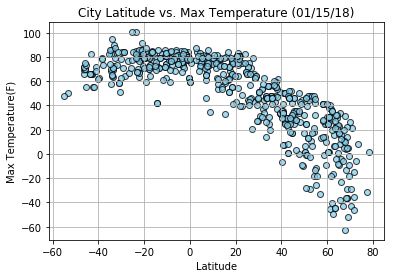

In [42]:
city_lat = updated_df['latitude']
city_temp = updated_df['temperature']

plt.scatter(city_lat, city_temp, marker="o", facecolors="skyblue", edgecolors="black", alpha=0.75)
plt.grid()

plt.title("City Latitude vs. Max Temperature (01/15/18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.savefig("../Images/lat_temp")
plt.show()

#### Latitude vs. Humidity Plot

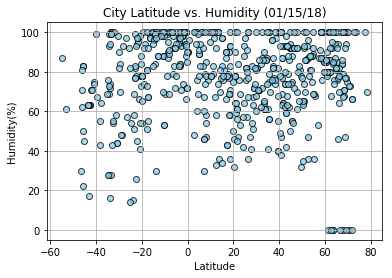

In [43]:
city_lat = updated_df['latitude']
city_hum = updated_df['humidity']

plt.scatter(city_lat, city_hum, marker="o", facecolors="skyblue", edgecolors="black", alpha=0.75)
plt.grid()

plt.title("City Latitude vs. Humidity (01/15/18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.savefig("../Images/lat_humidity")
plt.show()

#### Latitude vs. Cloudiness Plot

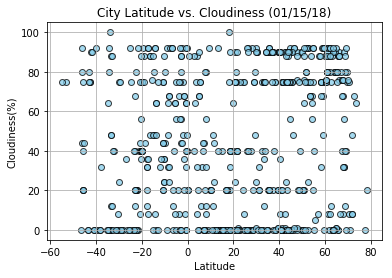

In [44]:
city_lat = updated_df['latitude']
city_cloud = updated_df['cloudiness']

plt.scatter(city_lat, city_cloud, marker="o", facecolors="skyblue", edgecolors="black", alpha=0.75)
plt.grid()

plt.title("City Latitude vs. Cloudiness (01/15/18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.savefig("../Images/lat_cloud")
plt.show()

#### Latitude vs. Wind Speed Plot

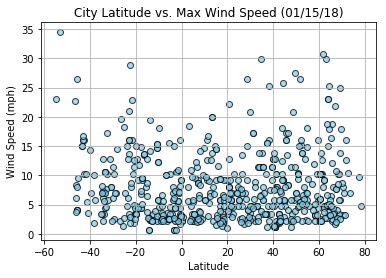

In [45]:
city_lat = updated_df['latitude']
city_wind = updated_df['wind speed']

plt.scatter(city_lat, city_wind, marker="o", facecolors="skyblue", edgecolors="black", alpha=0.75)
plt.grid()

plt.title("City Latitude vs. Max Wind Speed (01/15/18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("../Images/lat_wind")
plt.show()